# Clustering 

In [17]:
# general imports
import pandas as pd
import numpy as np

# for agglomerative clustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [18]:
# read in the data
data = pd.read_csv('Datasets/calcofi_combined.csv')
data.head()

,Cst_Cnt,Sta_ID,ChlorA,Phaeop,T_degC,Salnty,O2ml_L,PO4uM,SiO3uM,NO3uM,...,Year,Month,Julian_Day,Lat_Dec,Lon_Dec,Wind_Spd,Wave_Ht,Dry_T,Wave_Prd,Barometer
0,18832,133.0 035.0,0.650000,0.425000,13.172667,34.336533,2.785000,NaN,NaN,14.103333,...,1973,3,67,25.850000,-113.500000,12.0,3.0,19.0,6.0,1001.6
1,18833,142.7 008.0,2.483333,1.103333,16.316316,34.930211,2.298421,NaN,27.489474,NaN,...,1973,3,69,25.026666,-110.750000,7.0,NaN,19.2,NaN,1001.7
2,18834,142.0 008.0,0.240000,3.330000,14.762400,34.833250,2.067200,NaN,NaN,NaN,...,1973,3,69,25.093333,-110.783333,4.0,1.0,20.6,3.0,1001.7
3,18835,120.0 010.0,2.425000,2.483000,15.270000,NaN,3.535000,1.812,31.675000,NaN,...,1973,3,70,28.856666,-113.258333,15.0,1.0,18.8,1.0,1001.0
4,18836,120.0 009.0,5.540909,2.557273,14.281923,NaN,2.874615,NaN,NaN,NaN,...,1973,3,71,28.878333,-113.191666,10.0,1.0,18.9,2.0,1000.8


## Agglomerative clustering

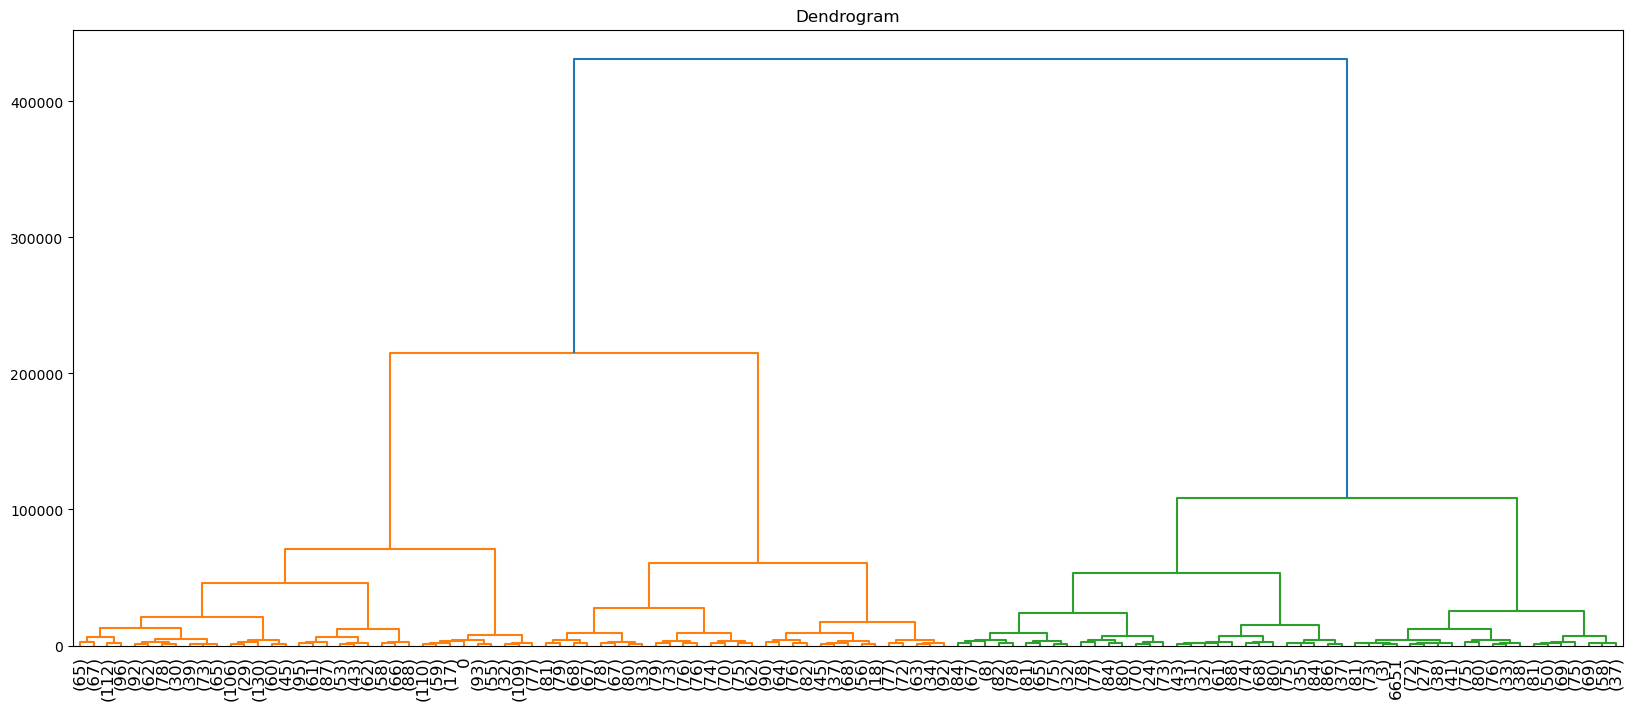

In [30]:
# Exclude 'Sta_ID' and 'Date' column because they are strs
data = data_clean.drop(columns=['Sta_ID', 'Date'])

# Need to drop all NAs for this to work
data = data.dropna()

# convert to numpy array
data = np.array(data)

# Perform hierarchical clustering
linked = linkage(data, method='ward')

plt.figure(figsize=(20, 8)) 

# Create a dendrogram
dendrogram(linked, 
           orientation='top', 
           distance_sort='descending',
           truncate_mode='lastp',  # Truncates the dendrogram for the last p clusters
           p=113)  # Number of clusters to show - there are 113 stations
plt.title('Dendrogram')
plt.tick_params(axis='x', labelsize=12)
plt.show()

We can see that there are two major groups

In [33]:
### now cluster
n_clusters = 4
cluster = AgglomerativeClustering(n_clusters=n_clusters, 
                                  metric='euclidean', 
                                  linkage='ward')
cn = cluster.fit_predict(data)

### find mean pattern of each cluster
cluster_pattern = np.array([data[cn==i].mean(axis=0) for i in range(n_clusters)])

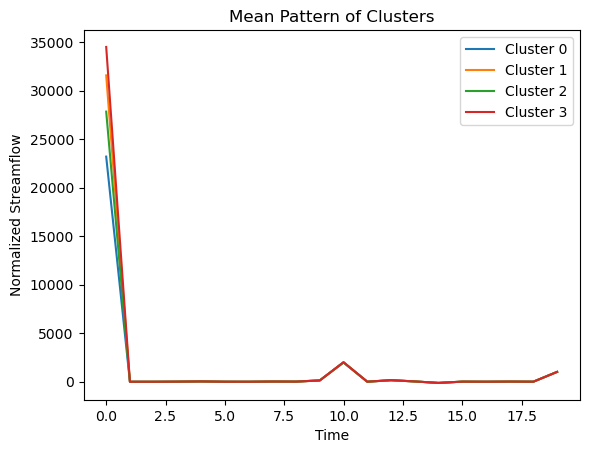

In [34]:
### visualize clusters
plt.plot(cluster_pattern.T)
plt.ylabel('Normalized Streamflow')
plt.xlabel('Time')
plt.title('Mean Pattern of Clusters')
plt.legend([f'Cluster {i}' for i in range(n_clusters)])

## K-means clustering